# Step 1: Import Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_columns",None)

# Step 2: Import Data

In [ ]:
df = pd.read_csv('glass.csv',
                          header=0)

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Step 3: EDA

In [ ]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

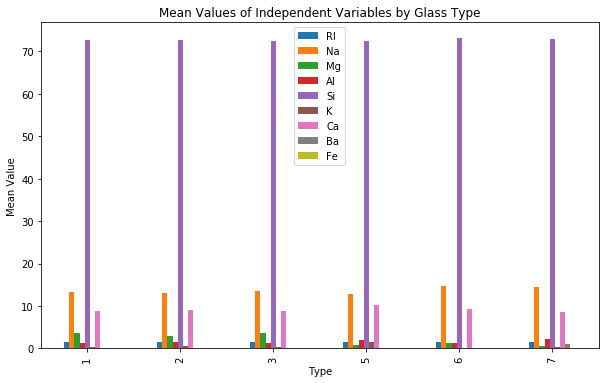

In [ ]:
# Select the relevant columns
selected_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Group the data by the 'Type' variable and calculate the mean for each independent variable
grouped_data = df.groupby('Type')[selected_columns].mean()

# Create the grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Mean Value')
plt.title('Mean Values of Independent Variables by Glass Type')

# Display the chart
plt.show()

# Step 4: Data Preprocessing

In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
# Select the columns for which you want to count outliers
selected_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']

# Iterate over each column
for column in selected_columns:
    # Calculate the IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers in the column
    num_outliers = sum((df[column] < lower_bound) | (df[column] > upper_bound))

    print("Number of outliers in column", column, ":", num_outliers)

Number of outliers in column RI : 17
Number of outliers in column Na : 7
Number of outliers in column Mg : 0
Number of outliers in column Al : 18
Number of outliers in column Si : 12
Number of outliers in column K : 7
Number of outliers in column Ca : 26
Number of outliers in column Ba : 38
Number of outliers in column Fe : 12
Number of outliers in column Type : 29


In [ ]:
new_df = df.columns

# Calculate the IQR for each selected column
Q1 = df[new_df].quantile(0.25)
Q3 = df[new_df].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataframe
df_filtered = df[~((df[new_df] < lower_bound) | (df[new_df] > upper_bound)).any(axis=1)]


In [ ]:
# Calculate summary statistics before outlier removal
summary_before = df.describe()

# Calculate summary statistics after outlier removal
summary_after = df_filtered.describe()

# Print the summary statistics
print("Summary Statistics - Before Outlier Removal:")
print(summary_before)

print("\nSummary Statistics - After Outlier Removal:")
print(summary_after)

Summary Statistics - Before Outlier Removal:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
m

By comparing the summary statistics before and after outlier removal, you can observe any changes in the mean, standard deviation, minimum, maximum, quartiles, and other statistical measures. If outliers were successfully removed, you would typically see differences in these summary statistics.

In [ ]:
df_rev = df_filtered.copy()

In [ ]:
df_rev.shape

(136, 10)

In [ ]:
df_rev.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
X = df_rev[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = df_rev['Type']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,
                                                random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
X_train_scale

array([[ 2.49379343e+00,  9.95648579e-01,  7.48869532e-01,
        -2.26207432e+00, -1.87527451e+00, -1.59513965e+00,
         1.75406867e+00,  0.00000000e+00, -6.54897353e-01],
       [-9.04595044e-01, -1.03804340e+00, -8.02604686e-02,
         5.01298034e-01,  1.12815982e+00,  7.54290844e-01,
        -6.26906614e-01,  0.00000000e+00, -6.54897353e-01],
       [ 1.73924590e+00,  1.09533936e+00, -1.78729282e+00,
         2.85970318e-01, -1.42080747e+00, -9.15041351e-02,
         1.92867352e+00,  0.00000000e+00,  1.54855937e+00],
       [ 1.71658793e-01,  3.97503880e-01,  9.76473846e-01,
        -6.11228499e-01, -4.32835653e-01,  3.31393354e-01,
        -7.69765131e-01,  0.00000000e+00, -6.54897353e-01],
       [ 3.02022194e+00,  1.58246001e-01,  3.26175806e-01,
        -1.90319480e+00, -1.42080747e+00, -1.83008270e+00,
         2.43661491e+00,  0.00000000e+00, -2.66052050e-01],
       [ 7.22222969e-02,  5.37070977e-01, -3.14881156e-02,
         1.00372937e+00, -1.51960465e+00,  2.844047

In [ ]:
X_test_scale

array([[-8.11007754e-01,  3.37689411e-01,  1.79858747e-01,
         6.08961892e-01, -1.16684672e-01,  7.54290844e-01,
        -8.80877311e-01,  0.00000000e+00,  6.41253659e-01],
       [ 8.96960291e-01,  1.11527752e+00, -1.57594596e+00,
        -5.75340547e-01,  1.00669128e-01, -2.39394602e+00,
         1.80168817e+00,  0.00000000e+00, -6.54897353e-01],
       [ 6.68841271e-01,  6.96576230e-01, -4.77455666e-02,
        -4.31788736e-01, -1.24297254e+00,  3.78381964e-01,
         4.36595678e-01,  0.00000000e+00, -6.54897353e-01],
       [-6.82325230e-01, -5.79465794e-01,  3.74948159e-01,
        -3.24124878e-01,  8.09096920e-02,  2.37416134e-01,
        -5.54725469e-02,  0.00000000e+00, -6.54897353e-01],
       [ 2.82793700e-01,  1.98122314e-01, -6.40030176e-02,
         6.80737797e-01, -1.12441593e+00,  2.37416134e-01,
         5.63581026e-01,  0.00000000e+00, -6.54897353e-01],
       [-8.05158548e-01,  3.57627567e-01,  2.77403453e-01,
        -3.60012831e-01,  1.99466310e-01,  8.012794

# KNN Classification

In [ ]:
#Predicting using the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=15)

#fit the model on the data and predict the values
model_KNN.fit(X_train_scale,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model_KNN.predict(X_test_scale)

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc_score)

[[17  2  0  0  0]
 [ 5 10  0  0  0]
 [ 4  1  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]]
Classification report: 
              precision    recall  f1-score   support

           1       0.61      0.89      0.72        19
           2       0.77      0.67      0.71        15
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.66        41
   macro avg       0.28      0.31      0.29        41
weighted avg       0.56      0.66      0.60        41

Accuracy of the model:  0.6585365853658537


# Applying different values of k

In [ ]:
acc_dict = dict() # Try and approch method

for K in range(1, 31):

    #Create object with k values
    model_KNN = KNeighborsClassifier(K, metric = 'euclidean')

    #Model Fit
    model_KNN.fit(X_train_scale, y_train)

    #Model Prediction
    y_pred = model_KNN.predict(X_test_scale)

    acc_score = round(accuracy_score(y_test, y_pred),2)

    #Print accuracy score
    print("Accuracy is: {} for K-Values: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is: 0.63 for K-Values: 1
Accuracy is: 0.68 for K-Values: 2
Accuracy is: 0.68 for K-Values: 3
Accuracy is: 0.71 for K-Values: 4
Accuracy is: 0.71 for K-Values: 5
Accuracy is: 0.71 for K-Values: 6
Accuracy is: 0.68 for K-Values: 7
Accuracy is: 0.68 for K-Values: 8
Accuracy is: 0.66 for K-Values: 9
Accuracy is: 0.68 for K-Values: 10
Accuracy is: 0.68 for K-Values: 11
Accuracy is: 0.66 for K-Values: 12
Accuracy is: 0.66 for K-Values: 13
Accuracy is: 0.61 for K-Values: 14
Accuracy is: 0.66 for K-Values: 15
Accuracy is: 0.66 for K-Values: 16
Accuracy is: 0.63 for K-Values: 17
Accuracy is: 0.63 for K-Values: 18
Accuracy is: 0.63 for K-Values: 19
Accuracy is: 0.66 for K-Values: 20
Accuracy is: 0.68 for K-Values: 21
Accuracy is: 0.71 for K-Values: 22
Accuracy is: 0.59 for K-Values: 23
Accuracy is: 0.66 for K-Values: 24
Accuracy is: 0.66 for K-Values: 25
Accuracy is: 0.63 for K-Values: 26
Accuracy is: 0.66 for K-Values: 27
Accuracy is: 0.63 for K-Values: 28
Accuracy is: 0.66 for K-Value

In [ ]:
# This will return maximum accuracy with k value
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":", acc_dict[k])

4 : 0.71
5 : 0.71
6 : 0.71
22 : 0.71


In [ ]:
model = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", n_jobs=-1)

#Model fit
model.fit(X_train_scale, y_train)

#Model prediction
y_pred = model.predict(X_test_scale)


In [ ]:
# Test Eval

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc_score)

[[14  5  0  0  0]
 [ 2 13  0  0  0]
 [ 2  2  1  0  0]
 [ 1  0  0  0  0]
 [ 0  0  0  0  1]]
Classification report: 
              precision    recall  f1-score   support

           1       0.74      0.74      0.74        19
           2       0.65      0.87      0.74        15
           3       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.71        41
   macro avg       0.68      0.56      0.56        41
weighted avg       0.73      0.71      0.68        41

Accuracy of the model:  0.7073170731707317
